<a href="https://colab.research.google.com/github/SrJames14/Proyecto/blob/main/SINIESTROVIAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SECRETARIA DE MOVILIDAD DISTRITAL (**BOGOTA DC**)
Registro de accidentes
#Descripcion del problema
##Cuales son los patrones temporales, demograficos entre accidentes?
##Que factores se relacionan mas con la gravedad de los siniestros?
##Que dia es mas frecuente un accidente?



In [ ]:
#Importacion de librerias
import pandas as pd #Para manejo facil de datos
import seaborn as sns #Herramientas de visualizacion
import matplotlib.pyplot as plt #Herramientas de graficos
import numpy as np #Herramientas de calculo
import missingno as msno #Para los datos faltantes


#Lectura y visualizacion de base de datos para verificar
df = pd.read_csv('datased.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'datased.csv'

In [ ]:
#Limpieza de datos y analisis principal
#Cambia los tipo de datos
df['FECHA_OCURRENCIA_ACC']= pd.to_datetime(df['FECHA_OCURRENCIA_ACC'])
#df['FECHA_OCURRENCIA_ACC'] = df['FECHA_OCURRENCIA_ACC'].dt.date.astype(str) #Los datos de fecha se pueden optimizar
df = df[(df['EDAD'] >= 0) & (df['EDAD'] <= 110)] #Elimina errores de edades imposibles
df['EDAD'] = df['EDAD'].astype(int) #Convierte la colunma Edad como tipo int
df['MUERTE_POSTERIOR'] = df['MUERTE_POSTERIOR'].replace({'N':'NO' , 'S':'SI'}) #Cambia la letra N o S remplazandola con la palabra No o si
df['FECHA_POSTERIOR_MUERTE']=df['FECHA_POSTERIOR_MUERTE'].fillna('No aplica') #cambia la frase NaN por No Aplica
#Elimina columnas innecesarias
df = df.drop(['ANO_OCURRENCIA_ACC' , 'MES_OCURRENCIA_ACC' , 'FECHA_HORA_ACC' , 'CODIGO_VEHICULO' , 'CONDICION_A'], axis=1)
df.head() #Vuelve a ver las 5 primeras filas para visualizar los cambios corregidos

<ipython-input-31-9d3fb06d2902>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EDAD'] = df['EDAD'].astype(int) #Convierte la colunma Edad como tipo int
<ipython-input-31-9d3fb06d2902>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MUERTE_POSTERIOR'] = df['MUERTE_POSTERIOR'].replace({'N':'NO' , 'S':'SI'}) #Cambia la letra N o S remplazandola con la palabra No o si
<ipython-input-31-9d3fb06d2902>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,X,Y,OBJECTID,CODIGO_ACCIDENTADO,FORMULARIO,FECHA_OCURRENCIA_ACC,HORA_OCURRENCIA_ACC,DIA_OCURRENCIA_ACC,DIRECCION,CLASE_ACC,LOCALIDAD,CONDICION,MUERTE_POSTERIOR,FECHA_POSTERIOR_MUERTE,GENERO,EDAD
0,-74.120169,4.533633,13,12905436,A001677733,2024-09-01 05:00:00+00:00,23:00:00,DOMINGO,KR 14 - CL 65 S 02,CHOQUE,USME,MOTOCICLISTA,NO,No aplica,MASCULINO,24
2,-74.178984,4.601791,27,12905444,A001677641,2024-09-03 05:00:00+00:00,22:50:00,MARTES,CL 59 S- KR 78 02,CHOQUE,BOSA,MOTOCICLISTA,NO,No aplica,MASCULINO,21
3,-74.181189,4.608725,77,12906038,A001614065,2024-09-07 05:00:00+00:00,04:02:00,SABADO,KR 80 - CL 59 S 02,CHOQUE,BOSA,MOTOCICLISTA,NO,No aplica,MASCULINO,41
4,-74.099087,4.599850,92,12906049,A001677132,2024-09-08 05:00:00+00:00,01:37:00,DOMINGO,KR 27 - CL 2 02,CHOQUE,LOS MARTIRES,MOTOCICLISTA,NO,No aplica,MASCULINO,24
5,-74.190757,4.618136,149,12906120,A001677773,2024-09-09 05:00:00+00:00,20:24:00,LUNES,KR 86 - CL 67 B S 02,CHOQUE,BOSA,MOTOCICLISTA,NO,No aplica,FEMENINO,32


In [ ]:
#Ver la informacion general con las columnas ya editadas
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8120 entries, 0 to 8655
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   X                       8120 non-null   float64            
 1   Y                       8120 non-null   float64            
 2   OBJECTID                8120 non-null   int64              
 3   CODIGO_ACCIDENTADO      8120 non-null   int64              
 4   FORMULARIO              8120 non-null   object             
 5   FECHA_OCURRENCIA_ACC    8120 non-null   datetime64[ns, UTC]
 6   HORA_OCURRENCIA_ACC     8120 non-null   object             
 7   DIA_OCURRENCIA_ACC      8120 non-null   object             
 8   DIRECCION               8120 non-null   object             
 9   CLASE_ACC               8118 non-null   object             
 10  LOCALIDAD               8033 non-null   object             
 11  CONDICION               8120 non-null   object  

#Extensiones y desarrollos de variables

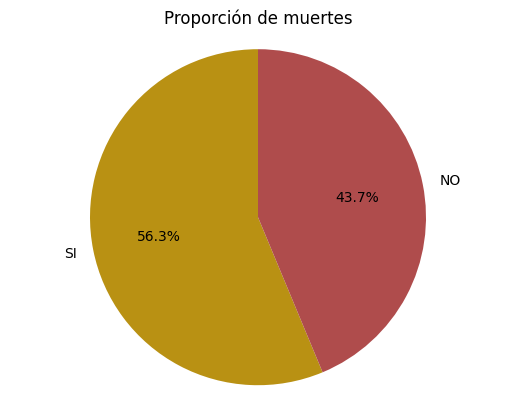

MUERTE_POSTERIOR
SI    2983
NO    2317
Name: count, dtype: int64


In [ ]:
#Definir variables para analisis
#Define la mortalidad general
Total_Muerte = df['MUERTE_POSTERIOR'].value_counts() #Crea la variable para contar las muertes
colores = ['#b99113', '#af4c4c'] #Seleccion de color para personalizacion del grafico con codigo HEX (2 colores)
plt.pie(Total_Muerte, labels=Total_Muerte.index, autopct='%1.1f%%', startangle=90 , colors=colores) #Crea grafico de torta para visualizar la proporcion
plt.title('Proporción de muertes') #Para agregar un titulo
plt.axis('equal')  #Ajusta la proporcion automaticamente (igual)
plt.show() #Muestra el grafico creado
print(Total_Muerte) #Muestra la informacion de la variable


#Conclusion
Se observa en el grafico de "proporcion de muertes" que en general, una mayor parte de personas accidentadas en transito, en la ciudad de bogota han sufrido una muerte, por lo que es mas probable que al sufrir un accidente de transito el conductor o pasajero pierdan la vida

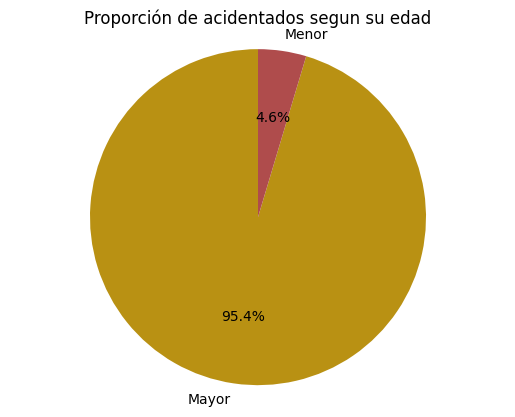

ES_MAYOR_EDAD
Mayor    7744
Menor     376
Name: count, dtype: int64


In [ ]:
df['ES_MAYOR_EDAD'] = np.where(df['EDAD'] >= 18, 'Mayor', 'Menor') #Crea una columna dependiendo de su edad
Total_Accidentados = df['ES_MAYOR_EDAD'].value_counts() #Variable de accidentalidad dependiendo de la columna creada
colors = ['#b99113', '#af4c4c'] #Seleccion de color para personalizacion del grafico con codigo HEX (2 colores)
plt.pie(Total_Accidentados, labels=Total_Accidentados.index, autopct='%1.1f%%', startangle=90 ,colors=colors) #Crea grafico de torta para visualizar la proporcion
plt.title('Proporción de acidentados segun su edad')  #Para agregar un titulo
plt.axis('equal')  #Ajusta la proporcion automaticamente (igual)
plt.show() #Muestra el grafico creado
print(Total_Accidentados) #Muestra informacion de la variable

#Conclusion
Para este caso la accidentalidad le ocurrieron a personas mayor de edad, ya que es mas logico que por lo general las personas mayores de edad conduzcan algun vehiculo, por lo que la gran mayoria de estos fueron los accidentados

In [ ]:

df.head() #Vuelve a ver las 5 primeras filas para visualizar la columna nueva

,X,Y,OBJECTID,CODIGO_ACCIDENTADO,FORMULARIO,FECHA_OCURRENCIA_ACC,HORA_OCURRENCIA_ACC,DIA_OCURRENCIA_ACC,DIRECCION,CLASE_ACC,LOCALIDAD,CONDICION,MUERTE_POSTERIOR,FECHA_POSTERIOR_MUERTE,GENERO,EDAD,ES_MAYOR_EDAD
0,-74.120169,4.533633,13,12905436,A001677733,2024-09-01,23:00:00,DOMINGO,KR 14 - CL 65 S 02,CHOQUE,USME,MOTOCICLISTA,NO,No aplica,MASCULINO,24,Mayor
2,-74.178984,4.601791,27,12905444,A001677641,2024-09-03,22:50:00,MARTES,CL 59 S- KR 78 02,CHOQUE,BOSA,MOTOCICLISTA,NO,No aplica,MASCULINO,21,Mayor
3,-74.181189,4.608725,77,12906038,A001614065,2024-09-07,04:02:00,SABADO,KR 80 - CL 59 S 02,CHOQUE,BOSA,MOTOCICLISTA,NO,No aplica,MASCULINO,41,Mayor
4,-74.099087,4.599850,92,12906049,A001677132,2024-09-08,01:37:00,DOMINGO,KR 27 - CL 2 02,CHOQUE,LOS MARTIRES,MOTOCICLISTA,NO,No aplica,MASCULINO,24,Mayor
5,-74.190757,4.618136,149,12906120,A001677773,2024-09-09,20:24:00,LUNES,KR 86 - CL 67 B S 02,CHOQUE,BOSA,MOTOCICLISTA,NO,No aplica,FEMENINO,32,Mayor


In [ ]:
#Hace cruces de variables para analisis en grafico de barras
df['AÑO'] = df['FECHA_OCURRENCIA_ACC'].dt.year
Muertos_por_año = (df[df['MUERTE_POSTERIOR'] == 'SI']['AÑO'].value_counts()).astype(str)

plt.figure(figsize=(20, 8))
plt.bar(Muertos_por_año.index, Muertos_por_año.values, color='blue')
plt.title('Muertes por año')
plt.xlabel('Año')
plt.ylabel('Total muertos')
plt.show()
print(df['AÑO'])

NameError: name 'df' is not defined